<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Hierarchical-Classification-of-Variable-Stars/blob/main/Traditional%20Methods/Variable_Stars_Traditional_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run in case of Feature Extraction purposes

In [1]:
!pip install feets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for feets: filename=feets-0.4-py3-none-any.whl size=141076 sha256=519d04ab6dde245f826ac40e3de656f1da4d4f1f305345407bc989e61503834a
  Stored in directory: /root/.cache/pip/wheels/70/65/e3/9d4a4c0da5914494b50f900492239f0b4839bc3746ff671729
Successfully built feets


In [2]:
!git clone https://github.com/quatrope/feets.git
!pip install -e 

Cloning into 'feets'...
remote: Enumerating objects: 2525, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 2525 (delta 77), reused 71 (delta 43), pack-reused 2397
Receiving objects: 100% (2525/2525), 24.79 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (1885/1885), done.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


# Installing patool to unrar data

In [3]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 8.2 MB/s eta 0:00:00


# Libraries

In [5]:
import os
import patoolib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.utils import shuffle
import feets
from astropy.timeseries import *
from scipy import stats
from sklearn.model_selection import learning_curve , validation_curve , GridSearchCV , ShuffleSplit , train_test_split
from collections import Counter
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix , classification_report
from sklearn import linear_model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Making the Dataframe after Feature Extraction 

**Read and urar file from GoogleDrive**

For this section, due high volume of data, you should download the data (OGLE3_DATASET.rar) from this [link](https://drive.google.com/file/d/1lwm12VdRICK1G57b6O0oEHGmDLsa7b2K/view?usp=sharing) and upload it in Google collaboratory if you want to run it there.

If you want to run it on your computer, you should change 'File_address' and 'Unrar_file_address.' 

https://stackoverflow.com/questions/17614467/how-can-unrar-a-file-with-python

In [9]:
File_address = "/content/OGLE3_DATASET.rar"
patoolib.extract_archive(File_address)

patool: Extracting /content/OGLE3_DATASET.rar ...
patool: running /usr/bin/unrar x -- /content/OGLE3_DATASET.rar
patool:     with cwd='./Unpack_pt2qo_me'
patool: ... /content/OGLE3_DATASET.rar extracted to `OGLE3_DATASET.csv'.


'OGLE3_DATASET.csv'

In [10]:
Unrar_file_address = '/content/OGLE3_DATASET.csv'
data_info = pd.read_csv(Unrar_file_address ,index_col ="ID")
data_info = data_info.drop(['Unnamed: 0'],axis=1)

For another dataset we need, we download it from GitHub by the following code.
First, we clone the GitHub repository and then download it from the data directory.

In [11]:
!git clone https://github.com/Mahdi-Abdollahii/Hierarchical-Classification-of-Variable-Stars.git

Cloning into 'Hierarchical-Classification-of-Variable-Stars'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 141 (delta 20), reused 0 (delta 0), pack-reused 92
Receiving objects: 100% (141/141), 3.76 MiB | 18.51 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [12]:
data_feature = pd.read_csv('/content/Hierarchical-Classification-of-Variable-Stars/Data/OGLE3_DATASET_FE.csv',index_col="ID") 

In [13]:
data = data_feature.merge(data_info, how='inner', on='ID')

In [14]:
df = data
targets = ['ECL', 'RRLyr', 'LPV' , 'DSCT' , 'Cep', 'T2Cep', 'aCep']
print(targets)
df['class_number'] = df['Type'].apply(lambda x: targets.index(x)) # We add a target col which is the index of the id in the list of ids

['ECL', 'RRLyr', 'LPV', 'DSCT', 'Cep', 'T2Cep', 'aCep']


In [15]:
ECL_SUB_name = [ 'EC' , 'ED' , 'ESD' ]
RRLyr_SUB_name = [ 'RRab' , 'RRc', 'RRd' , 'RRe' ]
LPV_SUB_name = [ 'Mira' , 'OSARG' , 'SRV' ]
DSCT_SUB_name = [ 'S' , '12' , '-99.99'  , '13' , '23' , 'F1' , 'F12']
Cep_SUB_name = [  'F'  , '1'  , '12', '123' , '13' , '2' , '23' , 'F1' , 'F12' ]
T2Cep_SUB_name = [ 'BLHer'  , 'RVTau' , 'WVir' , 'pWVir' , 'BLHer_1O' ]
aCep_SUB_name = [ 'F' , '1'  ]

sub_name_list = [ ECL_SUB_name , RRLyr_SUB_name , LPV_SUB_name 
                 , DSCT_SUB_name ,Cep_SUB_name , T2Cep_SUB_name , aCep_SUB_name ]

In [16]:
%%time
df = data
df['sub_class_number'] = 0
for k in range(len(df)):
   for i in range(len(sub_name_list)):
        for j in range(len(sub_name_list[i])):
            if df['Subtype'][k] == sub_name_list[i][j]:
                df['sub_class_number'][k] = j    

<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 22.2 s, sys: 441 ms, total: 22.7 s
Wall time: 28 s


In [17]:
#specialize for end to end
Not_sub_class = ['RRd' , 'RRe', '-99.99', '13' , '23' , 'F1' , 'F12' , 'BLHer_1O' , '123' , '13' , '2' , '23' , 'F1' , 'F12' , 'pWVir']
df = df[~df.Subtype.isin(Not_sub_class)]
df = df.drop(df[(df.class_number == 3) & (df.sub_class_number == 1 )].index) #for '12' in DSCT
#data

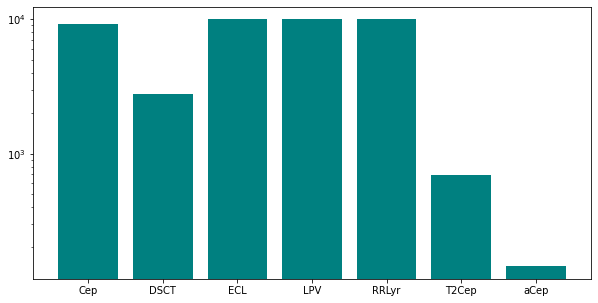

In [18]:
n = data.pivot_table(index=['Type'], aggfunc='size').index
s = list(data.pivot_table(index=['Type'], aggfunc='size'))

fig=plt.figure(figsize=(10,5))
line = plt.bar(n  , s  , color = 'teal' , log  = True )

plt.show()
fig.savefig('TRAhist.pdf',dpi=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe363b25a90>]],
      dtype=object)

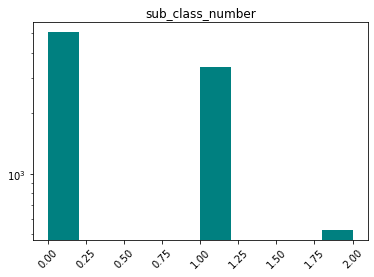

In [19]:
#plot histogram of each class 
df_new = df[df["class_number"]== 4] 
df_new.hist( column = 'sub_class_number' , color = 'teal',  log = True  , xrot = 45  ,  grid = False )

In [20]:
df_0=df[df["class_number"]==0]
df_1=df[df["class_number"]==1]
df_2=df[df["class_number"]==2]
df_3=df[df["class_number"]==3]
df_4=df[df["class_number"]==4]
df_5=df[df["class_number"]==5]
df_6=df[df["class_number"]==6]

df_0 = shuffle(df_0,random_state=0)
df_1 = shuffle(df_1,random_state=1)
df_2 = shuffle(df_2,random_state=2)
df_3 = shuffle(df_3,random_state=3)
df_4 = shuffle(df_4,random_state=4)
df_5 = shuffle(df_5,random_state=5)
df_6 = shuffle(df_6,random_state=6)

In [21]:
if len(df_0)>10000:
        df_0 = df_0.sample(n=10000,random_state=0,axis=0)

if len(df_1)>10000:
        df_1 = df_1.sample(n=10000,random_state=0,axis=0)
        
if len(df_2)>10000:
        df_2 = df_2.sample(n=10000,random_state=0,axis=0)
        
if len(df_3)>10000:
        df_3 = df_3.sample(n=10000,random_state=0,axis=0)
        
if len(df_4)>10000:
        df_4 = df_4.sample(n=10000,random_state=0,axis=0)
if len(df_5)>10000:
        df_5 = df_5.sample(n=10000,random_state=0,axis=0)
if len(df_6)>10000:
        df_6 = df_6.sample(n=10000,random_state=0,axis=0)

In [22]:
data = pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6])

In [23]:
# to reduce memory usage!!!!
del(df_0,df_1,df_2,df_3,df_4,df_5,df_6)

In [24]:
data

,Amplitude,Freq1_harmonics_amplitude_0,Freq1_harmonics_amplitude_1,Freq1_harmonics_amplitude_2,Freq1_harmonics_amplitude_3,Mean,PeriodLS,RA,Decl,Type,Subtype,I,V,P_1,A_1,N,loc,info,class_number,sub_class_number
ID,,,,,,,,,,,,,,,,,,,,
OGLE-SMC-ECL-0228,0.53275,0.155614,0.095839,0.092919,0.055763,19.745381,1.388662,00:35:21.60,-73:15:42.5,ECL,ED,19.605,19.882,NaN,1.180,704.0,SMC,[[2.09088084e+03 1.98280000e+01 1.97000000e-01...,0,1
OGLE-LMC-ECL-12369,0.04400,0.015841,0.004734,0.002839,0.001249,17.259803,1.580866,05:18:30.64,-69:42:18.0,ECL,ESD,17.294,17.263,3.161882,0.076,493.0,LMC,[[2.12393450e+03 1.72630000e+01 1.70000000e-02...,0,2
OGLE-SMC-ECL-3269,0.36925,0.114249,0.054335,0.059462,0.037907,19.612286,2.733256,00:55:40.33,-71:42:19.2,ECL,ED,19.510,19.807,NaN,0.969,709.0,SMC,[[2.08693259e+03 1.94690000e+01 1.13000000e-01...,0,1
OGLE-SMC-ECL-4056,0.18350,0.142498,0.047995,0.036992,0.011325,15.260273,1.876593,00:59:46.63,-72:05:32.6,ECL,ED,15.155,14.991,NaN,0.366,729.0,SMC,[[2.08692886e+03 1.51740000e+01 6.00000000e-03...,0,1
OGLE-LMC-ECL-04937,0.11500,0.052898,0.008327,0.006420,0.007399,18.250242,47.695688,05:00:29.07,-67:56:25.0,ECL,ESD,18.310,19.430,95.770538,0.217,454.0,LMC,[[2.16684886e+03 1.81700000e+01 2.80000000e-02...,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OGLE-LMC-ACEP-148,0.40250,0.301684,0.158241,0.074814,0.053860,17.663073,0.618897,05:55:43.99,-60:20:56.7,aCep,1,17.621,18.211,0.618835,0.846,NaN,NaN,[[8.06875619e+03 1.78920000e+01 1.30000000e-02...,6,1
OGLE-LMC-ACEP-085,0.37675,0.291574,0.157119,0.093408,0.042774,17.371094,0.915673,03:59:33.43,-63:16:40.5,aCep,F,17.358,17.974,0.915632,0.751,NaN,NaN,[[6.25174336e+03 1.76490000e+01 1.20000000e-02...,6,0
OGLE-LMC-ACEP-115,0.44100,0.299790,0.136627,0.105701,0.064277,17.003697,1.180516,05:25:53.31,-65:57:15.4,aCep,F,16.970,17.462,1.180511,0.917,NaN,NaN,[[5.26064719e+03 1.68760000e+01 9.00000000e-03...,6,0


# Some Functions

In [32]:
def star_photometry(star_name):    
    d1 = data
    a = d1.loc[str(star_name),'info'].replace('\n','').replace(' ',',').replace('[','').replace(']','')
    b = a.split(',')
    q = a.split(',')
    while("" in b) : 
        b.remove("") 
    while("nan" in b) : 
        b.remove("nan") 
    d = np.array(b)
    c = d.reshape((int(len(b)/3),3))
    c = c.astype(float)
    return c

In [26]:
def tm(name_star):
    a = np.array(star_photometry(name_star))
    time_ex = []
    magnitude_ex = []
    error_ex = []
    for i in range(len(a)):
        time_ex.append(a[i][0])
        magnitude_ex.append(a[i][1])
        error_ex.append(a[i][2])
    return time_ex,magnitude_ex,error_ex    

In [27]:
class  Data_Prepair :
    import numpy as np
    from sklearn.model_selection import train_test_split
    import pandas as pd
    def __init__(self , Dataframe ):

        Class_array = np.array(Dataframe['class_number']).reshape(len(Dataframe) , 1)
        Sub_Class_array = np.array(Dataframe['sub_class_number']).reshape(len(Dataframe) , 1)
        DT = np.concatenate( (Class_array , Sub_Class_array) , axis = 1 )


        #defining X and Y 
        X = np.array(df)[ : , 0 : 7]
        Y = np.array(Dataframe['class_number'])
        Y = Y.reshape(X.shape[0],1)
        
        self.X_out = X
        self.Y_out = Y
        self.DT_out = DT


    def   Class_Split(self ,  sub_class_number = -1  , train_percent = 80   ,  test_percent  = 20  ) :
            
            train_percent = train_percent / 100
            test_percent = test_percent /100

            X_train, X_test , DT_train, DT_test = train_test_split(self.X_out , self.DT_out  
                                                                , random_state=0 
                                                                , test_size = 1 - train_percent)
            if  sub_class_number == -1 :

                    Y_train = DT_train[:,0].reshape(len(X_train) , 1)
                    Y_test= DT_test[:,0].reshape(len(X_test) , 1)

                    headers=['Train ','Test']
                    rows  = ['ECL', 'RRLyr', 'LPV' , 'DSCT' , 'Cep', 'T2Cep', 'aCep','Total']
                    inf = []

                    for  i in range(len(rows)-1) :
                        inf.append([np.count_nonzero( Y_train == i ) , np.count_nonzero( Y_test == i)])  
                    inf.append([ len(Y_train), len(Y_test)])  

                    display( pd.DataFrame(inf, rows, headers) )

                    return X_train , X_test , Y_train ,Y_test
            
            if  sub_class_number > -1 :

                    index_list_train =[ ]
                    for i in range(len(X_train) ) :
                        if  DT_train[i,0] != (sub_class_number) :
                            index_list_train.append(i)

                    X_train = np.delete(X_train , index_list_train , 0)
                    Y_train = np.delete(DT_train ,index_list_train , 0).reshape(len(X_train) , 2)[:,1]

                    index_list_test =[ ]
                    for i in range(len(X_test) ) :
                        if  DT_test[i,0] != (sub_class_number) :
                            index_list_test.append(i)
                            
                    X_test = np.delete(X_test , index_list_test , 0)
                    Y_test = np.delete(DT_test ,index_list_test , 0).reshape(len(X_test) , 2)[:,1]
                    
                    ECL_SUB_name =  [ 'EC' , 'ED' , 'ESD' ]
                    RRLyr_SUB_name = [ 'RRab' , 'RRc']
                    LPV_SUB_name = [ 'Mira' , 'OSARG' , 'SRV' ]
                    DSCT_SUB_name = [ 'S' ]
                    Cep_SUB_name = [  'F'  , '1'  , '12' ]
                    T2Cep_SUB_name = [ 'BLHer'  , 'RVTau' , 'WVir']
                    aCep_SUB_name = [ 'F' , '1'  ]

                    sub_name_list = [ ECL_SUB_name , RRLyr_SUB_name , LPV_SUB_name 
                                    , DSCT_SUB_name ,Cep_SUB_name , T2Cep_SUB_name , aCep_SUB_name ]

                    headers=['Train ','Test']
                    rows  = sub_name_list[sub_class_number]
                    rows.append('Total')
                    inf = [ ]
                    for  i in range(len(rows)-1) :
                        inf.append([np.count_nonzero( Y_train == i ) , np.count_nonzero( Y_test == i)])  
                    
                    inf.append([ len(Y_train), len(Y_test)])  

                    display( pd.DataFrame(inf, rows, headers) )

                    return X_train , X_test , Y_train ,Y_test

            if  sub_class_number == -2 :
                    list_class = [0,0,0,1,1,2,2,2,3,4,4,4,5,5,5,6,6]
                    list_sub_class = [0,1,2,0,1,0,1,2,0,0,1,2,0,1,2,0,1]

                    Y_train = np.zeros([len(DT_train),1])
                    for j in range(len(list_class)):
                        for i in range(len(DT_train)) :
                            if  DT_train[i][0] == list_class[j] and DT_train[i][1] == list_sub_class[j] :
                                Y_train[i][0] = j

                    Y_test = np.zeros([len(DT_test),1])
                    for j in range(len(list_class)):
                        for i in range(len(DT_test)) :
                            if  DT_test[i][0] == list_class[j] and DT_test[i][1] == list_sub_class[j] :
                                Y_test[i][0] = j


                    headers=['Train ','Test']
                    rows  =  [ 'EC' , 'ED' , 'ESD' ,  'RRab' , 'RRc' ,'Mira' , 'OSARG' , 'SRV' , 'S' , 'F', '1' , '12' , 'BLHer'  , 'RVTau' , 'WVir' , 'F' , '1'  ,'Total']
                    inf = []

                    for  i in range(len(rows)-1) :
                        inf.append([np.count_nonzero( Y_train == i ) , np.count_nonzero( Y_test == i)])  
                    inf.append([ len(Y_train), len(Y_test)])  

                    display( pd.DataFrame(inf, rows, headers) )

                    return X_train , X_test , Y_train ,Y_test
                    

from :
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [28]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5),scoring="f1_weighted"):

    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

    title : string
    Title for the chart.

    X : array-like, shape (n_samples, n_features)
    Training vector, where n_samples is the number of samples and
    n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
    Target relative to X for classification or regression;
    None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
    Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
    Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:
    - None, to use the default 5-fold cross-validation,
    - integer, to specify the number of folds.
    - :term:`CV splitter`,
    - An iterable yielding (train, test) splits as arrays of indices.

    For integer/None inputs, if ``y`` is binary or multiclass,
    :class:`StratifiedKFold` used. If the estimator is not a classifier
    or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

    Refer :ref:`User Guide <cross_validation>` for the various
    cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
    Number of jobs to run in parallel.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
    Relative or absolute numbers of training examples that will be used to
    generate the learning curve. If the dtype is float, it is regarded as a
    fraction of the maximum size of the training set (that is determined
    by the selected validation method), i.e. it has to be within (0, 1].
    Otherwise it is interpreted as absolute sizes of the training sets.
    Note that for classification the number of samples usually have to
    be big enough to contain at least one sample from each class.
    (default: np.linspace(0.1, 1.0, 5))
    """

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
    train_sizes=train_sizes,
    return_times=True, scoring=scoring, )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1,
    color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1,
    color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
    label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
    label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [29]:
#first we optimize number of trees in our forest using validation curve

def plot_validation_curve(estimator , X , y , param_name , param_range , scoring , n_jobs , title , xlabel ):
    """
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    
    param_name : string 

    scoring : string 

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    title : string
        Title for the chart.

    xlabel : string
    """
    train_scores, test_scores = validation_curve(estimator, 
                                                X , y , param_name=param_name, 
                                                param_range=param_range, 
                                                scoring=scoring, 
                                                n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    #plt.ylim(0.92, 1.01)
    #plt.xlim(10, 600)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2,
                    color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2,
                    color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

# Feature Extraction


1. https://feets.readthedocs.io/en/latest/tutorial.html#The-Features
2. https://github.com/quatrope/feets

This is for extracting features of one star, we did the whole preprocessing in jupyter and didn't include the code here.

In [33]:
time_ex , magnitude_ex , error_x = tm("OGLE-LMC-ACEP-006")
lc = np.array([ time_ex , magnitude_ex ])

In [34]:
#%%time
fs = feets.FeatureSpace(only=["PeriodLS" ,'Amplitude', 'Mean' ,
                                  "Freq1_harmonics_amplitude_0","Freq1_harmonics_amplitude_1",
                                  "Freq1_harmonics_amplitude_2","Freq1_harmonics_amplitude_3"],data=['time','magnitude'])
features, values = fs.extract(*lc)

In [35]:
dict(zip(features, values))

{'Amplitude': 0.19450000000000145,
 'Freq1_harmonics_amplitude_0': 0.14343393874341137,
 'Freq1_harmonics_amplitude_1': 0.057163246004102296,
 'Freq1_harmonics_amplitude_2': 0.0300391054566827,
 'Freq1_harmonics_amplitude_3': 0.010421340966544939,
 'Mean': 17.06568609865471,
 'PeriodLS': 0.849597964819368}

**this is for extracting features  of several star**

In [36]:
%%time
indexNamesArr = data.index.values
for i in indexNamesArr[: : 1000]: 
    print(i)
    time_ex , magnitude_ex , error_x = tm(i)
    lc = np.array([ time_ex , magnitude_ex ])
    fs = feets.FeatureSpace(only=["PeriodLS" ,'Amplitude', 'Mean' ,
                                  "Freq1_harmonics_amplitude_0","Freq1_harmonics_amplitude_1",
                                  "Freq1_harmonics_amplitude_2","Freq1_harmonics_amplitude_3"],
                            data=['time','magnitude'])
    features, values = fs.extract(*lc)

OGLE-SMC-ECL-0228
OGLE-LMC-ECL-08298
OGLE-LMC-ECL-05211
OGLE-SMC-ECL-1143
OGLE-LMC-ECL-16473
OGLE-LMC-ECL-06200
OGLE-LMC-ECL-08533
OGLE-SMC-ECL-4439
OGLE-LMC-ECL-10830
OGLE-LMC-ECL-10857
OGLE-BLG-RRLYR-12173
OGLE-LMC-RRLYR-10235
OGLE-SMC-RRLYR-0663
OGLE-LMC-RRLYR-05626
OGLE-LMC-RRLYR-02971
OGLE-BLG-RRLYR-10061
OGLE-LMC-RRLYR-04234
OGLE-LMC-RRLYR-20609
OGLE-LMC-RRLYR-12554
OGLE-BLG-RRLYR-02039
OGLE-BLG-LPV-180825
OGLE-BLG-LPV-140234
OGLE-BLG-LPV-193794
OGLE-BLG-LPV-099669
OGLE-LMC-LPV-84206
OGLE-BLG-LPV-064315
OGLE-BLG-LPV-111279
OGLE-LMC-LPV-31825
OGLE-SMC-LPV-10920
OGLE-BLG-LPV-188505
OGLE-LMC-DSCT-0555
OGLE-LMC-DSCT-0835
OGLE-LMC-DSCT-2348
OGLE-SMC-CEP-1924
OGLE-SMC-CEP-4188
OGLE-BLG-CEP-18
OGLE-LMC-CEP-3315
OGLE-SMC-CEP-0540
OGLE-SMC-CEP-2572
OGLE-LMC-CEP-3528
OGLE-LMC-CEP-2309
OGLE-SMC-CEP-0090
OGLE-BLG-T2CEP-271
CPU times: user 33.2 s, sys: 17.8 s, total: 51 s
Wall time: 59.3 s


# Some useful information

In [37]:
print('The classes and corresponding frequencies are: \n {}'.format(dict(Counter(df['class_number'])) )) 

The classes and corresponding frequencies are: 
 {6: 144, 4: 8998, 5: 659, 2: 10000, 0: 10000, 1: 9998, 3: 2681}


In [38]:
np.array(df)[0 , 0 :7]

array([0.3257499999999993, 0.2167230305087218, 0.082939308779112,
       0.0781993952116534, 0.0491852044097233, 18.044918032786885,
       0.8502535162037914], dtype=object)

In [41]:
df.columns

Index(['Amplitude', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Mean', 'PeriodLS', 'RA', 'Decl', 'Type',
       'Subtype', 'I', 'V', 'P_1', 'A_1', 'N', 'loc', 'info', 'class_number',
       'sub_class_number'],
      dtype='object')

In [42]:
# splitting the train and test data

X = np.array(df)[ : , 0:7]
Y = df['Type'].values

X_train, X_test, Y_train, Y_test = train_test_split(X  , Y , random_state = 0 , test_size = .2)

print('The classes and corresponding frequencies in train set are: \n {}'.format(dict(Counter(Y_train)) )) 
print('The classes and corresponding frequencies in test set are: \n {}'.format(dict(Counter(Y_test)) )) 

The classes and corresponding frequencies in train set are: 
 {'LPV': 8021, 'DSCT': 2123, 'ECL': 8016, 'RRLyr': 8002, 'aCep': 121, 'Cep': 7160, 'T2Cep': 541}
The classes and corresponding frequencies in test set are: 
 {'LPV': 1979, 'RRLyr': 1996, 'Cep': 1838, 'ECL': 1984, 'DSCT': 558, 'T2Cep': 118, 'aCep': 23}


In [43]:
data_inf = Data_Prepair(data) 

In [44]:
X_train,  X_test , Y_train ,Y_test = data_inf.Class_Split( -1 , 80  , 20)

,Train,Test
ECL,7973,2027
RRLyr,8033,1965
LPV,8017,1983
DSCT,2153,528
Cep,7153,1845
T2Cep,537,122
aCep,118,26
Total,33984,8496


In [45]:
X_train.shape

(33984, 7)

# Random Forest
from : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html





In [ ]:
data_inf = Data_Prepair( data  ) 

In [ ]:
X_train,  X_test , Y_train ,Y_test = data_inf.Class_Split( -1 , 80  , 20)

,Train,Test
ECL,7973,2027
RRLyr,8033,1965
LPV,8017,1983
DSCT,2153,528
Cep,7153,1845
T2Cep,537,122
aCep,118,26
Total,33984,8496


**First we use the default hyper-parameters and see the result**

In [ ]:
RF_clf = RandomForestClassifier()

In [ ]:
%%time
RF_clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


CPU times: user 9.88 s, sys: 901 ms, total: 10.8 s
Wall time: 10.8 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
%%time
RF_clf.predict(X_test)

CPU times: user 233 ms, sys: 34 µs, total: 233 ms
Wall time: 234 ms


array([1, 4, 0, ..., 4, 4, 0])

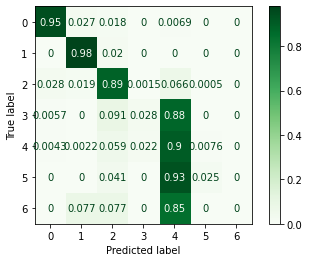

In [ ]:
plot_confusion_matrix(RF_clf, X_test, Y_test, normalize='true' , cmap=plt.cm.Greens)

In [ ]:
RF_clf_report = classification_report(Y_test, RF_clf.predict(X_test))
print(RF_clf_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2027
           1       0.95      0.98      0.97      1965
           2       0.88      0.89      0.88      1983
           3       0.25      0.03      0.05       528
           4       0.69      0.90      0.78      1845
           5       0.17      0.02      0.04       122
           6       0.00      0.00      0.00        26

    accuracy                           0.86      8496
   macro avg       0.56      0.54      0.53      8496
weighted avg       0.82      0.86      0.83      8496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Fine Tuning**

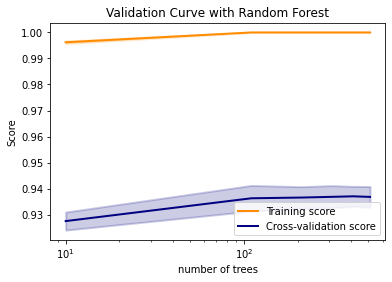

CPU times: user 495 ms, sys: 335 ms, total: 830 ms
Wall time: 4min 56s


In [ ]:
#first we optimize number of trees in our forest using validation curve
%%time
param_range = np.arange(10,600, 100)
title = "Validation Curve with Random Forest"
xlabel = r"number of trees"
estimator = RandomForestClassifier(max_depth=30,class_weight='balanced',random_state=0,criterion='entropy')
plot_validation_curve(estimator , X_train , Y_train , "n_estimators" , param_range , "f1_weighted" , -1 , title , xlabel )

In [ ]:
%%time
#Now we use grid search to optimize criterion, max_features and min_samples_split
parameters = {'min_samples_split':np.arange(1,20,1),
              'criterion':['gini','entropy'],
              'max_features' : ['sqrt', 'log2']}

RF = RandomForestClassifier(n_estimators=10, max_depth=30, class_weight='balanced',random_state=0)
clf = GridSearchCV(RF, parameters,n_jobs=-1,scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.9281972159769583
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 9}
CPU times: user 1.91 s, sys: 1.94 s, total: 3.85 s
Wall time: 1min 36s


In [ ]:
%%time
#Now we use grid search to optimize min_samples_leaf
parameters = {'min_samples_leaf':np.arange(0,100,1)}

RF = RandomForestClassifier(n_estimators=10, max_depth=30, class_weight='balanced',random_state=0, max_features='sqrt',criterion='entropy',min_samples_split=9)
clf = GridSearchCV(RF, parameters,n_jobs=-1,scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.9281972159769583
{'min_samples_leaf': 1}
CPU times: user 2.78 s, sys: 3.38 s, total: 6.16 s
Wall time: 2min 13s


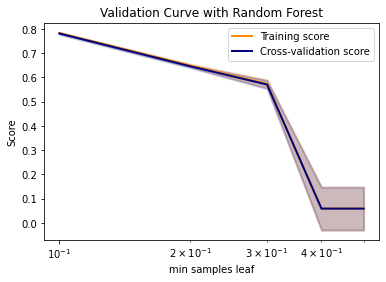

CPU times: user 674 ms, sys: 682 ms, total: 1.36 s
Wall time: 14.5 s


In [ ]:
# we use validation curve to be sure what number is best for our min_samples_leaf
%%time
param_range = np.arange(0,2, .1)
title = "Validation Curve with Random Forest"
xlabel = r"min samples leaf"
estimator = RandomForestClassifier(max_depth=30,class_weight='balanced',random_state=0,criterion='entropy',max_features='sqrt')
plot_validation_curve(estimator , X_train , Y_train , "min_samples_leaf" , param_range , "f1_weighted" , -1 , title , xlabel )

In [ ]:
%%time
#Now we use grid search to optimize max_depth

parameters = {'max_depth':np.arange(0,100,1)}

RF = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=0, max_features='sqrt',criterion='entropy',min_samples_split=9, min_samples_leaf=1)
clf = GridSearchCV(RF, parameters,n_jobs=-1,scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.9281972159769583
{'max_depth': 24}
CPU times: user 3.21 s, sys: 3.22 s, total: 6.43 s
Wall time: 3min 16s


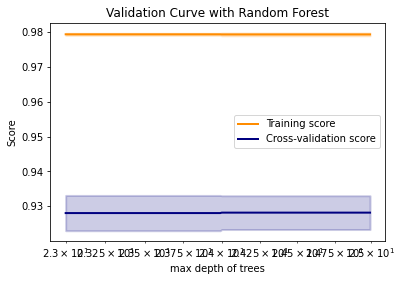

CPU times: user 4.78 s, sys: 6.88 s, total: 11.7 s
Wall time: 6min 7s


In [ ]:
# we use validation curve to be sure of the optimized number of maximum depth of trees
%%time
param_range = np.arange(23,25, .01)
title = "Validation Curve with Random Forest"
xlabel = r"max depth of trees"
estimator = RandomForestClassifier(n_estimators=10,class_weight='balanced',
                                                                    random_state=0,criterion='entropy',max_features='sqrt',
                                                                    min_samples_leaf=1, min_samples_split=9)
plot_validation_curve(estimator , X_train , Y_train , "max_depth" , param_range , "f1_weighted" , -1 , title , xlabel )

In [ ]:
%%time
#Now we use grid search to optimize max_samples
parameters = {'max_samples':np.arange(0,5,0.1)}

RF = RandomForestClassifier(n_estimators=10, max_depth=24, class_weight='balanced',random_state=0, max_features='sqrt',criterion='entropy',min_samples_split=9, min_samples_leaf=1)
clf = GridSearchCV(RF, parameters,n_jobs=-1,scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.9269391360688738
{'max_samples': 0.9}
CPU times: user 997 ms, sys: 583 ms, total: 1.58 s
Wall time: 10.9 s


**Now with all the optimized hyper-parameters we train our RF classifier**

In [ ]:
from sklearn.utils import compute_class_weight
weights = compute_class_weight ("balanced", [0,1,2,3,4,5,6], df['class_number'])
class_weight=dict()
for i in range(len(targets)):
  class_weight[i]=weights[i]

class_weight

{0: 0.6068571428571429,
 1: 0.6069785385648558,
 2: 0.6068571428571429,
 3: 2.2635477167368254,
 4: 0.6744355888610167,
 5: 9.20875785822675,
 6: 42.142857142857146}

In [ ]:
RF_clf = RandomForestClassifier(n_estimators=500, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                class_weight=class_weight,
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0
                                )

In [ ]:
%%time
RF_clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


CPU times: user 1min 44s, sys: 6.71 s, total: 1min 50s
Wall time: 1min 51s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.6068571428571429,
                                     1: 0.6069785385648558,
                                     2: 0.6068571428571429,
                                     3: 2.2635477167368254,
                                     4: 0.6744355888610167, 5: 9.20875785822675,
                                     6: 42.142857142857146},
                       criterion='entropy', max_depth=24, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=True)

In [ ]:
%%time
RF_clf.predict(X_test)

CPU times: user 963 ms, sys: 5.34 ms, total: 969 ms
Wall time: 975 ms


array([1, 4, 0, ..., 4, 4, 0])

In [ ]:
targets

['ECL', 'RRLyr', 'LPV', 'DSCT', 'Cep', 'T2Cep', 'aCep']

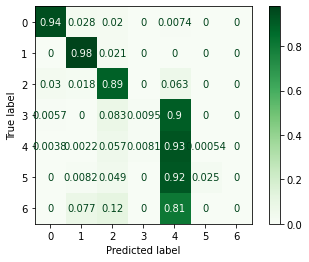

In [ ]:
plot_confusion_matrix(RF_clf, X_test, Y_test, normalize='true' , cmap=plt.cm.Greens)

In [ ]:
y_predict=RF_clf.predict(X_test)
confusion_matrix(Y_test, y_predict)

array([[1915,   56,   41,    0,   15,    0,    0],
       [   0, 1924,   41,    0,    0,    0,    0],
       [  60,   36, 1763,    0,  124,    0,    0],
       [   3,    0,   44,    5,  476,    0,    0],
       [   7,    4,  106,   15, 1712,    1,    0],
       [   0,    1,    6,    0,  112,    3,    0],
       [   0,    2,    3,    0,   21,    0,    0]])

In [ ]:
RF_clf_report = classification_report(Y_test, RF_clf.predict(X_test))
print(RF_clf_report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2016
           1       0.94      0.96      0.95      1954
           2       0.97      0.99      0.98      1980
           3       0.97      0.97      0.97       568
           4       0.94      0.97      0.96      1893
           5       1.00      0.14      0.24        22
           6       0.88      0.69      0.77       144

    accuracy                           0.95      8577
   macro avg       0.95      0.80      0.83      8577
weighted avg       0.95      0.95      0.95      8577



**Feature Importance**

In [ ]:
RF_clf.fit(X_train, Y_train)
importances = RF_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(data)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="c", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
df.columns

Index(['Amplitude', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Mean', 'PeriodLS', 'target'],
      dtype='object')

**Learning curve**

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


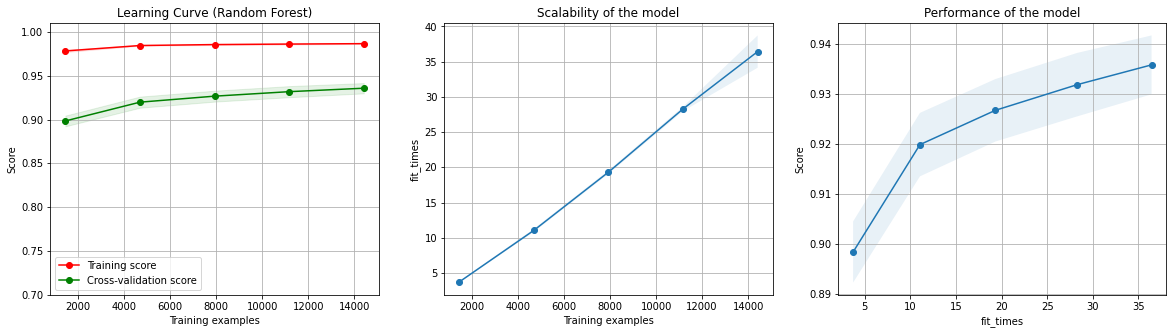

CPU times: user 619 ms, sys: 383 ms, total: 1 s
Wall time: 8min 43s


In [ ]:
##Learning curve with f1_weighted score
%%time

X, y = X_train , Y_train
title = r"Learning Curve (Random Forest)"
estimator = RF_clf
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(0.7, 1.01),cv=10, n_jobs=-1)

plt.show()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


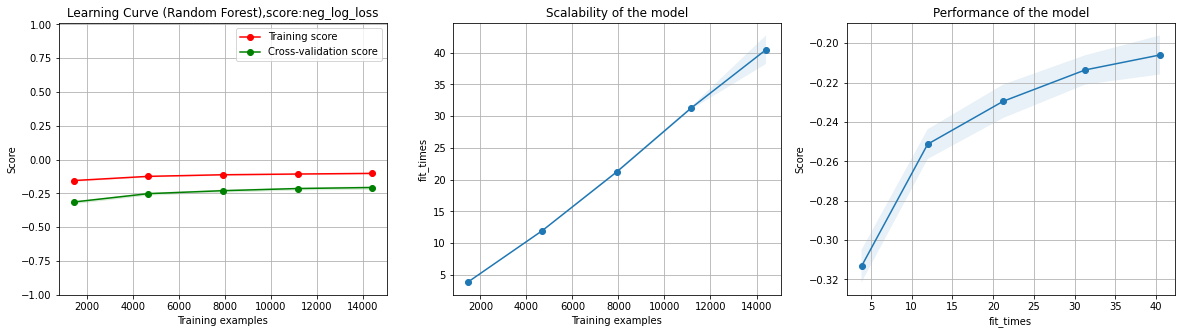

CPU times: user 706 ms, sys: 340 ms, total: 1.05 s
Wall time: 9min 36s


In [ ]:
#Learning curve with neg_log_loss score
%%time

X, y = X_train , Y_train
title = r"Learning Curve (Random Forest),score:neg_log_loss"
estimator = RF_clf
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(-1, 1.01),cv=10, n_jobs=-1,scoring="neg_log_loss")

plt.show()

**Now we try one vs rest classifier**

In [ ]:
RF_onevsrest_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                class_weight='balanced',
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0
                                ))

In [ ]:
%%time
RF_onevsrest_clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions.

CPU times: user 5min 26s, sys: 38.5 s, total: 6min 5s
Wall time: 6min 6s


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=24,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=0.9,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=9,
                                                     min_weight_fraction_leaf=0,
                                        

In [ ]:
%%time
RF_onevsrest_clf.predict(X_test)

CPU times: user 3.62 s, sys: 2.01 ms, total: 3.62 s
Wall time: 3.64 s


array([1, 4, 0, ..., 4, 4, 0])

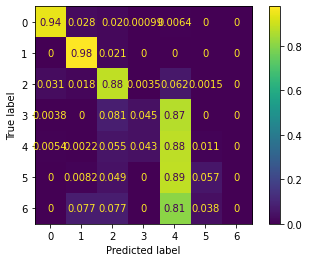

In [ ]:
plot_confusion_matrix(RF_onevsrest_clf, X_test, Y_test, normalize='true')

In [ ]:
RF_onevsrest_clf_report = classification_report(Y_test, RF_onevsrest_clf.predict(X_test))
print(RF_onevsrest_clf_report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       446
           1       0.95      0.94      0.94      1542
           2       0.82      0.67      0.73        60
           3       0.89      0.87      0.88       319
           4       0.95      0.96      0.96      1638

    accuracy                           0.94      4005
   macro avg       0.90      0.88      0.89      4005
weighted avg       0.94      0.94      0.94      4005



# RF with 3 features

**With 3 features (just testing if we can continue with 3 features)**

In [ ]:
df.columns

Index(['Amplitude', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Mean', 'PeriodLS', 'target'],
      dtype='object')

In [ ]:
X1 = df.drop(['target','Freq1_harmonics_amplitude_0','Freq1_harmonics_amplitude_1','Freq1_harmonics_amplitude_2','Freq1_harmonics_amplitude_3'], axis=1).values
Y1 = df['target'].values

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1  , Y1, random_state = 0 , test_size = .2)
#X1
RF_clf = RandomForestClassifier(n_estimators=500, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                class_weight='balanced',
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt')

In [ ]:
%%time
RF_clf.fit(X1_train, Y1_train)

CPU times: user 16 s, sys: 21.8 ms, total: 16 s
Wall time: 16 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=24, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
%%time
RF_clf.predict(X1_test)

CPU times: user 333 ms, sys: 896 µs, total: 333 ms
Wall time: 333 ms


array([1, 4, 2, ..., 1, 1, 1])

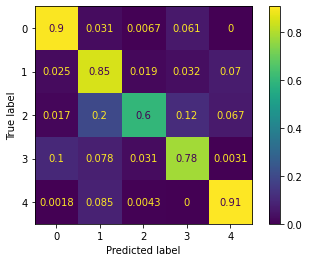

In [ ]:
plot_confusion_matrix(RF_clf, X1_test, Y1_test, normalize='true')

In [ ]:
RF_clf_report = classification_report(Y1_test, RF_clf.predict(X1_test))
print(RF_clf_report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       446
           1       0.87      0.85      0.86      1542
           2       0.42      0.60      0.49        60
           3       0.75      0.78      0.77       319
           4       0.93      0.91      0.92      1638

    accuracy                           0.87      4005
   macro avg       0.76      0.81      0.78      4005
weighted avg       0.88      0.87      0.87      4005



# Ridge Classifier
from:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

**First we use the default hyper-parameters**

In [ ]:
Ridge_clf = linear_model.RidgeClassifier()

In [ ]:
%%time
Ridge_clf.fit(X_train,Y_train)

CPU times: user 10.6 ms, sys: 6.11 ms, total: 16.8 ms
Wall time: 25.2 ms


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
%%time
Ridge_clf.predict(X_test)

CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 1.04 ms


array([4, 4, 4, ..., 1, 1, 1])

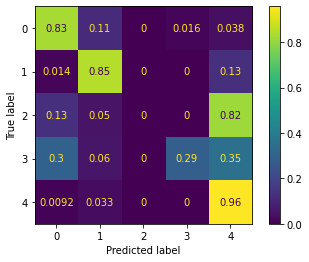

In [ ]:
plot_confusion_matrix(Ridge_clf, X_test, Y_test, normalize='true')

In [ ]:
Ridge_clf_report = classification_report(Y_test, Ridge_clf.predict(X_test))
print(Ridge_clf_report)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       446
           1       0.91      0.85      0.88      1542
           2       0.00      0.00      0.00        60
           3       0.93      0.29      0.44       319
           4       0.80      0.96      0.87      1638

    accuracy                           0.84      4005
   macro avg       0.67      0.59      0.59      4005
weighted avg       0.83      0.84      0.82      4005



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Fine Tuning**

In [ ]:
# Grid search to optimize alpha and tol
%%time

alpha = np.arange(2,5,0.01)

parameters = {'alpha':alpha,'tol':[0.01,0.001,.0001,.00001]}
Ridge_clf = linear_model.RidgeClassifier(class_weight='balanced')
clf = GridSearchCV(Ridge_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)


0.8187937399377093
{'alpha': 4.389999999999949, 'tol': 0.01}
CPU times: user 1min 10s, sys: 5.41 s, total: 1min 16s
Wall time: 1min 16s


In [ ]:
# Grid search to optimize max_iter
%%time

parameters = {'max_iter':np.arange(0,20,1)}
Ridge_clf = linear_model.RidgeClassifier(alpha=4.389999999999949,tol=0.01,class_weight='balanced')
clf = GridSearchCV(Ridge_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.8187937399377093
{'max_iter': 0}
CPU times: user 1.43 s, sys: 380 ms, total: 1.81 s
Wall time: 1.82 s


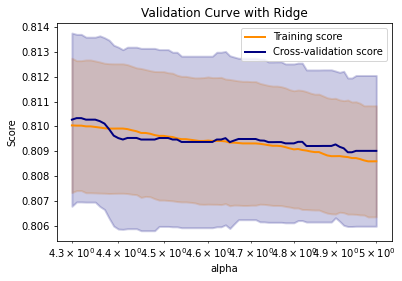

CPU times: user 1.73 s, sys: 1.2 s, total: 2.93 s
Wall time: 6.61 s


In [ ]:
# we use validation curve to be sure of the optimized number of alpha
%%time
param_range = np.arange(4.3,5,0.01)
title = "Validation Curve with Ridge"
xlabel = r"alpha"
estimator = RidgeClassifier(max_iter=0,tol=0.01)
plot_validation_curve(estimator , X_train , Y_train , "alpha" , param_range , "f1_weighted" , -1 , title , xlabel )

In [ ]:
%%time

parameters = {'normalize':['False','True']}
Ridge_clf = linear_model.RidgeClassifier(alpha=4.389999999999949, max_iter=0, tol=0.01, class_weight='balanced')
clf = GridSearchCV(Ridge_clf, parameters, scoring="f1_macro")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.46802432416176315
{'normalize': 'False'}
CPU times: user 134 ms, sys: 44.8 ms, total: 179 ms
Wall time: 179 ms


In [ ]:
%%time

parameters = {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_clf = linear_model.RidgeClassifier(alpha=4.389999999999949, max_iter=0, tol=0.01, class_weight='balanced')
clf = GridSearchCV(Ridge_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.8187937399377093
{'solver': 'auto'}
CPU times: user 692 ms, sys: 455 ms, total: 1.15 s
Wall time: 670 ms


**Now with all the optimized hyper-parameters we train our Ridge classifier**

In [ ]:
from sklearn.utils import compute_class_weight
weights=compute_class_weight ("balanced", [0,1,2,3,4], Y)
class_weight=dict()
for i in range(len(targets)):
  class_weight[i]=weights[i]

class_weight

{0: 1.7229776247848536,
 1: 0.5248656442521956,
 2: 12.474143302180686,
 3: 2.5375158428390368,
 4: 0.4901701554657853}

In [ ]:
Ridge_clf = RidgeClassifier(alpha=4.389999999999949, 
                            fit_intercept= 'True', 
                            #normalize = 'True', 
                            solver = 'auto',
                            max_iter = 0, 
                            tol = 0.01,
                            class_weight=class_weight,
                            random_state=0  
                            )

In [ ]:
%%time
Ridge_clf.fit(X_train,Y_train)

CPU times: user 15.3 ms, sys: 3.7 ms, total: 19 ms
Wall time: 20.6 ms


RidgeClassifier(alpha=4.389999999999949,
                class_weight={0: 1.7229776247848536, 1: 0.5248656442521956,
                              2: 12.474143302180686, 3: 2.5375158428390368,
                              4: 0.4901701554657853},
                copy_X=True, fit_intercept='True', max_iter=0, normalize=False,
                random_state=0, solver='auto', tol=0.01)

In [ ]:
%%time
Ridge_clf.predict(X_test)

CPU times: user 591 µs, sys: 0 ns, total: 591 µs
Wall time: 600 µs


array([4, 4, 4, ..., 1, 1, 0])

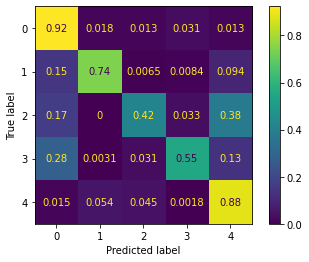

In [ ]:
plot_confusion_matrix(Ridge_clf, X_test, Y_test, normalize='true')

In [ ]:
y_predict=Ridge_clf.predict(X_test)
confusion_matrix(Y_test, y_predict)

array([[ 412,    8,    6,   14,    6],
       [ 226, 1148,   10,   13,  145],
       [  10,    0,   25,    2,   23],
       [  90,    1,   10,  175,   43],
       [  24,   88,   74,    3, 1449]])

In [ ]:
Ridge_clf_report = classification_report(Y_test, Ridge_clf.predict(X_test))
print(Ridge_clf_report)

              precision    recall  f1-score   support

           0       0.54      0.92      0.68       446
           1       0.92      0.74      0.82      1542
           2       0.20      0.42      0.27        60
           3       0.85      0.55      0.67       319
           4       0.87      0.88      0.88      1638

    accuracy                           0.80      4005
   macro avg       0.68      0.70      0.66      4005
weighted avg       0.84      0.80      0.81      4005



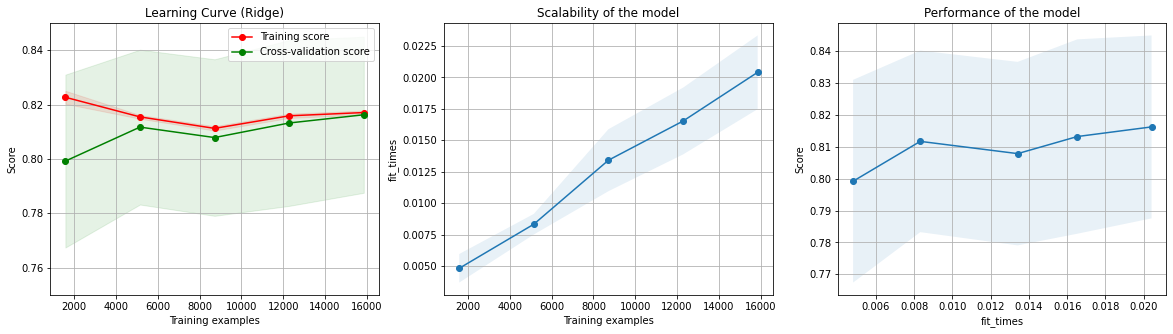

CPU times: user 2.37 s, sys: 1.62 s, total: 3.99 s
Wall time: 7.78 s


In [ ]:
%%time
#Learning curve
X, y = X_train , Y_train
title = r"Learning Curve (Ridge)"
estimator = Ridge_clf
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(0.75, 0.85),cv=100, n_jobs=-1)

plt.show()

**Now we use one vs rest classifier**

In [ ]:
%%time
Ridge_onevsrest_clf = OneVsRestClassifier(RidgeClassifier(alpha=4.389999999999949, 
                            fit_intercept= 'True', 
                            #normalize = 'True', 
                            solver = 'auto',
                            max_iter = 0, 
                            tol = 0.01,
                            class_weight='balanced',
                            random_state=0                    
                            ))

CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 62.9 µs


In [ ]:
%%time
Ridge_onevsrest_clf.fit(X_train, Y_train)

CPU times: user 80.1 ms, sys: 72.5 ms, total: 153 ms
Wall time: 85.6 ms


OneVsRestClassifier(estimator=RidgeClassifier(alpha=4.389999999999949,
                                              class_weight='balanced',
                                              copy_X=True, fit_intercept='True',
                                              max_iter=0, normalize=False,
                                              random_state=0, solver='auto',
                                              tol=0.01),
                    n_jobs=None)

In [ ]:
%%time
Ridge_onevsrest_clf.predict(X_test)

CPU times: user 1.93 ms, sys: 0 ns, total: 1.93 ms
Wall time: 2.47 ms


array([4, 4, 4, ..., 1, 1, 1])

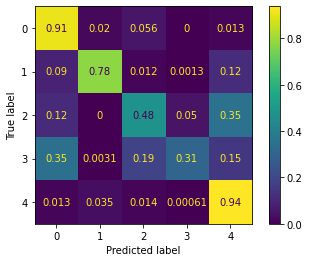

In [ ]:
plot_confusion_matrix(Ridge_onevsrest_clf, X_test, Y_test, normalize='true')

In [ ]:
Ridge_onevsrest_clf_report = classification_report(Y_test, Ridge_onevsrest_clf.predict(X_test))
print(Ridge_onevsrest_clf_report)

              precision    recall  f1-score   support

           0       0.59      0.91      0.72       446
           1       0.95      0.78      0.85      1542
           2       0.19      0.48      0.27        60
           3       0.94      0.31      0.46       319
           4       0.86      0.94      0.90      1638

    accuracy                           0.82      4005
   macro avg       0.71      0.68      0.64      4005
weighted avg       0.86      0.82      0.82      4005



**Fine Tuning**

In [ ]:
# Grid search to optimize alpha and tol
%%time

alpha = np.arange(2,5,0.01)

parameters = {'estimator__alpha':alpha,'estimator__tol':[0.01,0.001,.0001,.00001]}
Ridge_onevsrest_clf = OneVsRestClassifier(linear_model.RidgeClassifier(class_weight='balanced'),n_jobs=-1) 
clf = GridSearchCV(Ridge_onevsrest_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

In [ ]:
# Grid search to optimize max_iter
%%time

parameters = {'max_iter':np.arange(0,20,1)}
Ridge_onevsrest_clf = OneVsRestClassifier(linear_model.RidgeClassifier(alpha=2.0799999999999983,tol=0.01,class_weight='balanced'))
clf = GridSearchCV(Ridge_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.8161235630649889
{'max_iter': 0}
CPU times: user 1.13 s, sys: 262 ms, total: 1.39 s
Wall time: 1.39 s


In [ ]:
%%time

parameters = {'estimator__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_onevsrest_clf = OneVsRestClassifier(linear_model.RidgeClassifier(alpha=2.0799999999999983, max_iter=0, tol=0.01, class_weight='balanced'))
clf = GridSearchCV(Ridge_onevsrest_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.8221165328404947
{'estimator__solver': 'auto'}
CPU times: user 2.48 s, sys: 2.08 s, total: 4.56 s
Wall time: 2.34 s


**Now we use hyper parameters to train the classifier**

In [ ]:
%%time
Ridge_onevsrest_clf = OneVsRestClassifier(RidgeClassifier(alpha=2.0799999999999983, 
                            fit_intercept= 'True', 
                            #normalize = 'True', 
                            solver = 'auto',
                            max_iter = 0, 
                            tol = 0.01,
                            class_weight='balanced',
                            random_state=0                    
                            ))

CPU times: user 17 µs, sys: 9 µs, total: 26 µs
Wall time: 16.5 µs


In [ ]:
%%time
Ridge_onevsrest_clf.fit(X_train, Y_train)

CPU times: user 70.5 ms, sys: 47.5 ms, total: 118 ms
Wall time: 66.7 ms


OneVsRestClassifier(estimator=RidgeClassifier(alpha=2.0799999999999983,
                                              class_weight='balanced',
                                              copy_X=True, fit_intercept='True',
                                              max_iter=0, normalize=False,
                                              random_state=0, solver='auto',
                                              tol=0.01),
                    n_jobs=None)

In [ ]:
%%time
Ridge_onevsrest_clf.predict(X_test)

CPU times: user 3.31 ms, sys: 4.04 ms, total: 7.35 ms
Wall time: 5.99 ms


array([4, 4, 4, ..., 1, 1, 1])

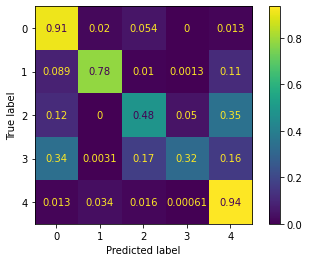

In [ ]:
plot_confusion_matrix(Ridge_onevsrest_clf, X_test, Y_test, normalize='true')

In [ ]:
Ridge_onevsrest_clf_report = classification_report(Y_test, Ridge_onevsrest_clf.predict(X_test))
print(Ridge_onevsrest_clf_report)

              precision    recall  f1-score   support

           0       0.60      0.91      0.72       446
           1       0.95      0.78      0.86      1542
           2       0.19      0.48      0.28        60
           3       0.94      0.32      0.48       319
           4       0.86      0.94      0.90      1638

    accuracy                           0.82      4005
   macro avg       0.71      0.69      0.65      4005
weighted avg       0.86      0.82      0.82      4005



# SVM
from:https://scikit-learn.org/stable/modules/svm.html

In [ ]:
%%time
SVM_clf = SVC()
SVM_clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 7s, sys: 517 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%time
SVM_clf.predict(X_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


array([1, 2, 2, ..., 2, 2, 2])

CPU times: user 9.74 s, sys: 3.05 ms, total: 9.74 s
Wall time: 9.76 s


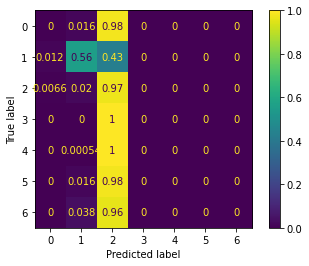

In [ ]:
%%time
plot_confusion_matrix(SVM_clf, X_test, Y_test, normalize='true')

In [ ]:
SVM_clf_report = classification_report( Y_test , SVM_clf.predict(X_test) )
print(SVM_clf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2027
           1       0.94      0.56      0.70      1965
           2       0.27      0.97      0.42      1983
           3       0.00      0.00      0.00       528
           4       0.00      0.00      0.00      1845
           5       0.00      0.00      0.00       122
           6       0.00      0.00      0.00        26

    accuracy                           0.36      8496
   macro avg       0.17      0.22      0.16      8496
weighted avg       0.28      0.36      0.26      8496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%%time
#Now we use grid search to optimize criterion, max_features and min_samples_split
parameters = {'C':np.arange(0,2000,100),
              'gamma':['auto','scale'],
              }

svm = svm.SVC()
clf = GridSearchCV(svm, parameters,n_jobs=-1,scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)
run()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


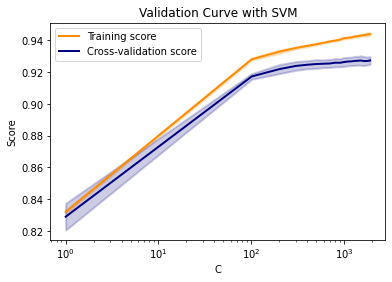

CPU times: user 873 ms, sys: 104 ms, total: 977 ms
Wall time: 6min 41s


In [ ]:
%%time
param_range = np.arange(1,2000,100)
title = "Validation Curve with SVM"
xlabel = r"C"
estimator = SVC( gamma='auto',class_weight='balanced')
plot_validation_curve(estimator , X_train , Y_train , "C" , param_range , "f1_weighted" , -1 , title , xlabel )

In [ ]:
%%time
SVM_clf = SVC(C=1100 , gamma='auto',class_weight='balanced',probability=True)
SVM_clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 4min 48s, sys: 646 ms, total: 4min 49s
Wall time: 4min 49s


In [ ]:
%time
SVM_clf.predict(X_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


array([1, 3, 0, ..., 3, 3, 0])

CPU times: user 5.38 s, sys: 3.87 ms, total: 5.38 s
Wall time: 5.39 s


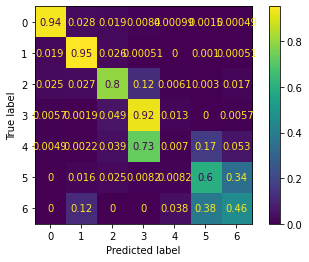

In [ ]:
%%time
plot_confusion_matrix(SVM_clf, X_test, Y_test, normalize='true')

In [ ]:
SVM_clf_report = classification_report( Y_test , SVM_clf.predict(X_test) )
print(SVM_clf_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2027
           1       0.94      0.95      0.95      1965
           2       0.89      0.80      0.84      1983
           3       0.23      0.92      0.37       528
           4       0.36      0.01      0.01      1845
           5       0.18      0.60      0.28       122
           6       0.06      0.46      0.11        26

    accuracy                           0.70      8496
   macro avg       0.52      0.67      0.50      8496
weighted avg       0.75      0.70      0.67      8496



In [ ]:
targets

['ECL', 'RRLyr', 'LPV', 'DSCT', 'Cep', 'T2Cep', 'aCep']

In [ ]:
X, y = X_train , Y_train
title = r"Learning Curve (SVM), score : f1_weighted"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C=1100 , gamma="auto",class_weight="balanced",probability=True)
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(0.7, 1.01),cv=cv, n_jobs=-1)

plt.show()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


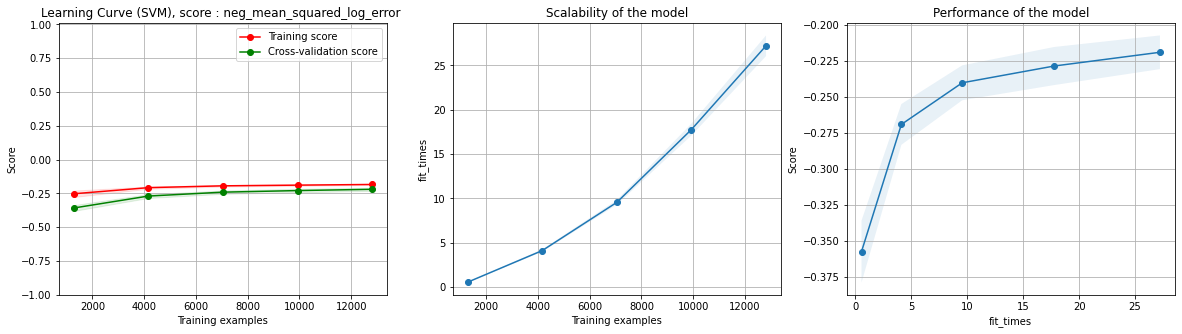

CPU times: user 715 ms, sys: 88.2 ms, total: 803 ms
Wall time: 5min 29s


In [ ]:
%%time
X, y = X_train , Y_train
title = r"Learning Curve (SVM), score : neg_mean_squared_log_error "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C=1100 , gamma="auto",class_weight="balanced",probability=True)
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(-1, 1.01),cv=cv, n_jobs=-1 , scoring="neg_log_loss" )

plt.show()

**Now we try one vs rest classifier**

In [ ]:
%%time
OVR_SVC_clf = OneVsRestClassifier(SVC(C=1100 , gamma='auto',class_weight='balanced'))
OVR_SVC_clf.fit(X_train, Y_train)

CPU times: user 3min 47s, sys: 235 ms, total: 3min 47s
Wall time: 3min 48s


In [ ]:
%%time
OVR_SVC_clf.predict(X_test)

CPU times: user 9.9 s, sys: 957 µs, total: 9.9 s
Wall time: 9.92 s


array([1, 3, 0, ..., 4, 4, 0])

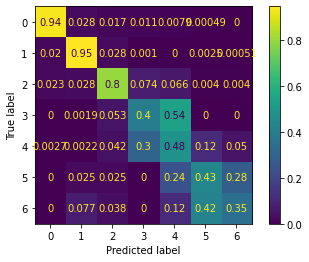

In [ ]:
y_predict=OVR_SVC_clf.predict(X_test)
confusion_matrix(Y_test, y_predict)
plot_confusion_matrix(OVR_SVC_clf, X_test, Y_test, normalize='true')

In [ ]:
OVR_SVC_clf_report = classification_report(Y_test, OVR_SVC_clf.predict(X_test))
print(OVR_SVC_clf_report)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      2016
           1       0.89      0.95      0.92      1954
           2       0.96      0.98      0.97      1980
           3       0.95      0.94      0.94       568
           4       0.95      0.93      0.94      1893
           5       0.14      0.59      0.23        22
           6       0.69      0.72      0.71       144

    accuracy                           0.92      8577
   macro avg       0.79      0.85      0.80      8577
weighted avg       0.93      0.92      0.92      8577



In [ ]:
targets

['CEP', 'ECL', 'ACEP', 'T2CEP', 'RRLYR']

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


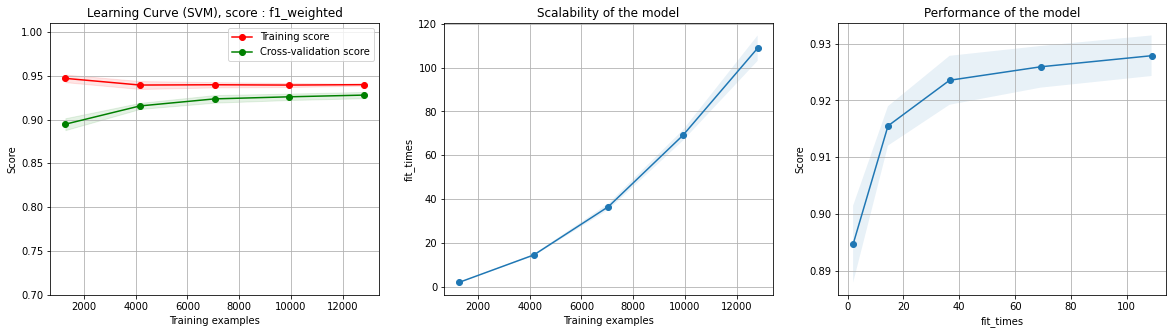

In [ ]:
X, y = X_train , Y_train
title = r"Learning Curve (SVM), score : f1_weighted"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = OneVsRestClassifier(SVC(C=1100 , gamma='auto',class_weight='balanced' , probability=True))
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(0.7, 1.01),cv=cv, n_jobs=-1)

plt.show()

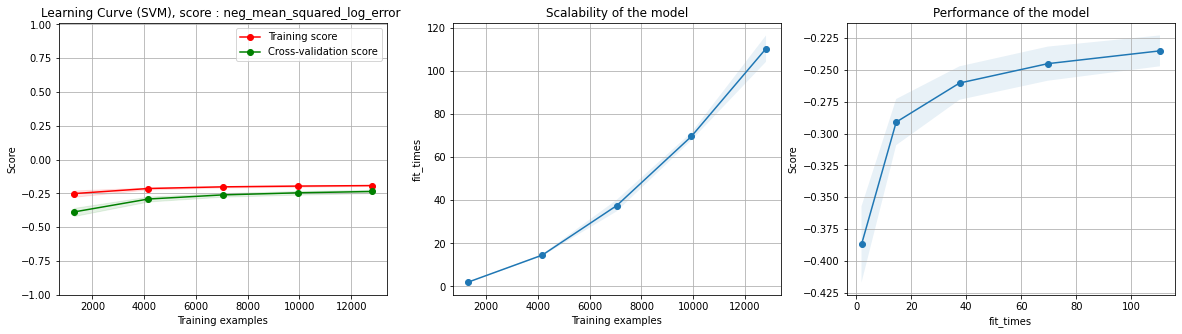

CPU times: user 746 ms, sys: 47.4 ms, total: 793 ms
Wall time: 20min 51s


In [ ]:
%%time
X, y = X_train , Y_train
title = r"Learning Curve (SVM), score : neg_mean_squared_log_error "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = OneVsRestClassifier(SVC(C=1100 , gamma='auto',class_weight='balanced' , probability=True))
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(-1, 1.01),cv=cv, n_jobs=-1 , scoring="neg_log_loss" )

plt.show()

# K Nearest  Neighbors
from :
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**First we use the default hyper-parameters and see the result**

In [ ]:
KNN_clf = KNeighborsClassifier()

In [ ]:
%%time
KNN_clf.fit(X_train, Y_train)

CPU times: user 18.8 ms, sys: 0 ns, total: 18.8 ms
Wall time: 24.1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
%%time
KNN_clf.predict(X_test)

CPU times: user 114 ms, sys: 1.96 ms, total: 116 ms
Wall time: 117 ms


array([1, 4, 2, ..., 1, 1, 3])

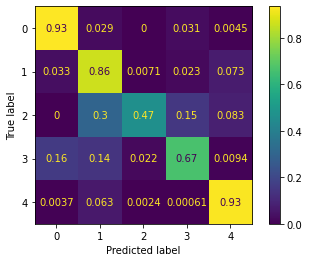

In [ ]:
plot_confusion_matrix(KNN_clf, X_test, Y_test, normalize='true')

In [ ]:
KNN_report = classification_report(Y_test, KNN_clf.predict(X_test))
print(KNN_report)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       446
           1       0.88      0.86      0.87      1542
           2       0.56      0.47      0.51        60
           3       0.78      0.67      0.72       319
           4       0.93      0.93      0.93      1638

    accuracy                           0.88      4005
   macro avg       0.79      0.77      0.78      4005
weighted avg       0.88      0.88      0.88      4005



**Fine Tuning**

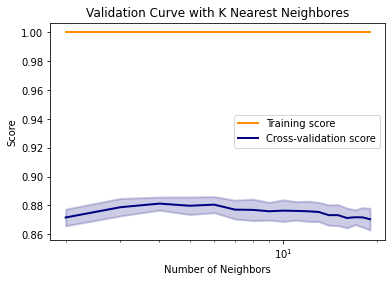

CPU times: user 613 ms, sys: 129 ms, total: 742 ms
Wall time: 12.5 s


In [ ]:
#first we optimize number of neighbors in our KNN using validation curve
%%time
param_range = np.arange(2, 20, 1)
title = "Validation Curve with K Nearest Neighbores"
xlabel = r"Number of Neighbors"
estimator = KNeighborsClassifier(algorithm='auto' , weights = 'distance')
plot_validation_curve(estimator , X_train , Y_train , "n_neighbors" , param_range , "f1_weighted" , -1 , title , xlabel )

In [ ]:
%%time
#Now we use grid search to optimize number of neighbors


parameters = {'n_neighbors':np.arange(2,100,1)}

KNN = KNeighborsClassifier(algorithm='auto' , weights = 'distance')
clf = GridSearchCV(KNN, parameters,n_jobs=-1,scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.8812866919281692
{'n_neighbors': 4}
CPU times: user 860 ms, sys: 94.7 ms, total: 955 ms
Wall time: 29.6 s


In [ ]:
%%time
#Now we use grid search to optimize algorithm and weight
from sklearn.model_selection import GridSearchCV

parameters = {'algorithm':['auto','ball_tree', 'kd_tree' , 'brute'],
              'weights' : ['uniform', 'distance'] }

KNN= KNeighborsClassifier(n_neighbors = 4)
clf = GridSearchCV(KNN_clf, parameters, n_jobs=-1 , scoring='f1_weighted')
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.879803537998774
{'algorithm': 'auto', 'weights': 'distance'}
CPU times: user 128 ms, sys: 71.8 ms, total: 199 ms
Wall time: 9.68 s


**Now with all the optimized hyper-parameters we train our KNN classifier**

In [ ]:
from sklearn.utils import compute_class_weight
weights = compute_class_weight ("balanced", [0,1,2,3,4], Y)
class_weight=dict()
for i in range(len(targets)):
  class_weight[i]=weights[i]

class_weight

{0: 1.7229776247848536,
 1: 0.5248656442521956,
 2: 12.474143302180686,
 3: 2.5375158428390368,
 4: 0.4901701554657853}

In [ ]:
KNN_clf = KNeighborsClassifier(n_neighbors = 4 , algorithm='auto' , weights = 'distance')

In [ ]:
%%time
KNN_clf.fit(X_train,Y_train)

CPU times: user 16.5 ms, sys: 719 µs, total: 17.2 ms
Wall time: 20 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
%%time
KNN_clf.predict(X_test)

CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 30.5 ms


array([1, 4, 2, ..., 1, 1, 3])

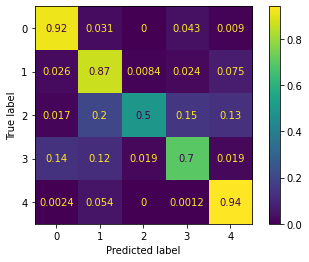

In [ ]:
plot_confusion_matrix(KNN_clf, X_test, Y_test, normalize='true')

In [ ]:
y_predict=KNN_clf.predict(X_test)
confusion_matrix(Y_test, y_predict)

array([[ 409,   14,    0,   19,    4],
       [  40, 1336,   13,   37,  116],
       [   1,   12,   30,    9,    8],
       [  44,   39,    6,  224,    6],
       [   4,   89,    0,    2, 1543]])

In [ ]:
KNN_clf_report = classification_report(Y_test, KNN_clf.predict(X_test))
print(KNN_clf_report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       446
           1       0.90      0.87      0.88      1542
           2       0.61      0.50      0.55        60
           3       0.77      0.70      0.73       319
           4       0.92      0.94      0.93      1638

    accuracy                           0.88      4005
   macro avg       0.80      0.79      0.79      4005
weighted avg       0.88      0.88      0.88      4005



**Learning Curve**


from :
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

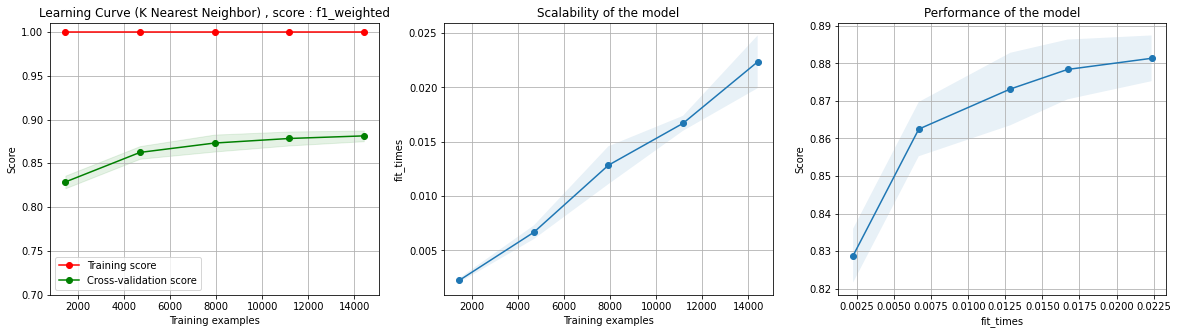

CPU times: user 629 ms, sys: 40.6 ms, total: 669 ms
Wall time: 3.37 s


In [ ]:
%%time
#Learning curve
X, y = X_train , Y_train

title = r"Learning Curve (K Nearest Neighbor) , score : f1_weighted"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNN_clf
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(0.7, 1.01),cv=10, n_jobs=-1)

plt.show()

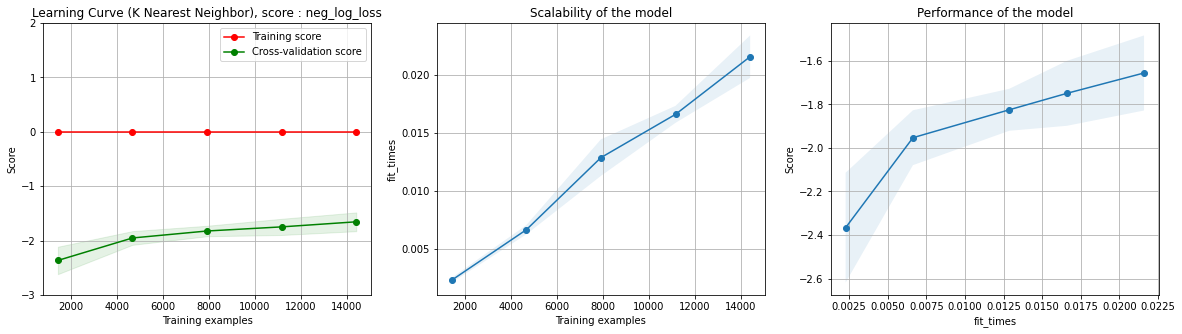

CPU times: user 600 ms, sys: 31.1 ms, total: 631 ms
Wall time: 3.25 s


In [ ]:
%%time
#Learning curve
X, y = X_train , Y_train

title = r"Learning Curve (K Nearest Neighbor), score : neg_log_loss"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNN_clf
plot_learning_curve(estimator, title, X, y, axes=None, ylim=(-3, 2),cv=10, n_jobs=-1, scoring= "neg_log_loss")

plt.show()

# QDA Classifier
from : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

**First we use the default hyper-parameters**

In [ ]:
QDA_clf = QuadraticDiscriminantAnalysis()

In [ ]:
%%time
QDA_clf.fit(X_train,Y_train)

CPU times: user 10.2 ms, sys: 5.62 ms, total: 15.8 ms
Wall time: 10.8 ms


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
%%time
QDA_clf.predict(X_test)

CPU times: user 2.23 ms, sys: 106 µs, total: 2.33 ms
Wall time: 2.34 ms


array([4, 4, 4, ..., 1, 1, 1])

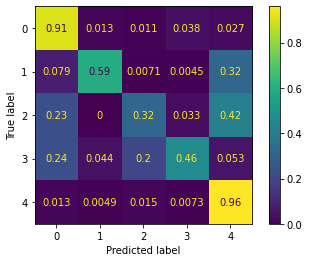

In [ ]:
plot_confusion_matrix(QDA_clf, X_test, Y_test, normalize='true')

In [ ]:
QDA_clf_report = classification_report(Y_test, QDA_clf.predict(X_test))
print(QDA_clf_report)
targets

              precision    recall  f1-score   support

           0       0.64      0.91      0.75       446
           1       0.97      0.59      0.74      1542
           2       0.15      0.32      0.21        60
           3       0.80      0.46      0.59       319
           4       0.74      0.96      0.84      1638

    accuracy                           0.76      4005
   macro avg       0.66      0.65      0.62      4005
weighted avg       0.81      0.76      0.76      4005



['CEP', 'ECL', 'ACEP', 'T2CEP', 'RRLYR']

**Fine Tuning**

In [ ]:
# Grid search to optimize reg_param
%%time

reg_param = np.arange(1,5,0.1)

parameters = {'reg_param':reg_param}
QDA_clf = QuadraticDiscriminantAnalysis()
clf = GridSearchCV(QDA_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: invalid value encountered in log
  u

0.3777770573201829
{'reg_param': 1.0}
CPU times: user 3.11 s, sys: 2.38 s, total: 5.49 s
Wall time: 2.88 s


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: invalid value encountered in log
  u

In [ ]:
# Grid search to optimize tol
%%time

parameters = {'tol':np.arange(0,0.001,1e-5)}
QDA_clf = QuadraticDiscriminantAnalysis(reg_param = 1.0)
clf = GridSearchCV(QDA_clf, parameters, scoring="f1_weighted")
clf.fit(X_train, Y_train)

print (clf.best_score_)
print (clf.best_params_)

0.37777705732018285
{'tol': 0.0}
CPU times: user 6.07 s, sys: 4.48 s, total: 10.6 s
Wall time: 5.38 s


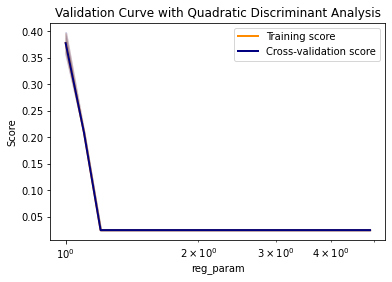

CPU times: user 1.07 s, sys: 71.8 ms, total: 1.14 s
Wall time: 3.67 s


In [ ]:
%%time
# we use validation curve to be sure of the optimized number of reg_param
param_range = np.arange(1,5,0.1)
title = "Validation Curve with Quadratic Discriminant Analysis"
xlabel = r"reg_param"
estimator = QuadraticDiscriminantAnalysis(tol=0)
plot_validation_curve(estimator , X_train , Y_train , "reg_param" , param_range , "f1_weighted" , -1 , title , xlabel )

**Now with all the optimized hyper-parameters we train our QDA classifier**

In [ ]:
from sklearn.utils import compute_class_weight
weights=compute_class_weight ("balanced", [0,1,2,3,4], Y)
class_weight=dict()
for i in range(len(targets)):
  class_weight[i]=weights[i]

class_weight

{0: 1.7229776247848536,
 1: 0.5248656442521956,
 2: 12.474143302180686,
 3: 2.5375158428390368,
 4: 0.4901701554657853}

In [ ]:
QDA_clf = QuadraticDiscriminantAnalysis(tol = 0.0 , reg_param = 1)

In [ ]:
%%time
QDA_clf.fit(X_train,Y_train)

CPU times: user 8.18 ms, sys: 8.77 ms, total: 16.9 ms
Wall time: 12.9 ms


QuadraticDiscriminantAnalysis(priors=None, reg_param=1, store_covariance=False,
                              tol=0.0)

In [ ]:
%%time
QDA_clf.predict(X_test)

CPU times: user 2.34 ms, sys: 678 µs, total: 3.02 ms
Wall time: 3.4 ms


array([4, 4, 4, ..., 4, 4, 0])

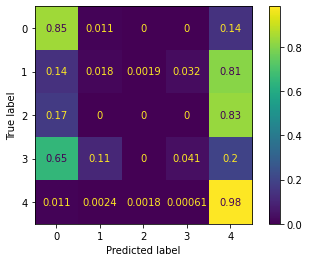

In [ ]:
plot_confusion_matrix(QDA_clf, X_test, Y_test, normalize='true')

In [ ]:
y_predict=QDA_clf.predict(X_test)
confusion_matrix(Y_test, y_predict)

array([[ 377,    5,    0,    0,   64],
       [ 215,   28,    3,   49, 1247],
       [  10,    0,    0,    0,   50],
       [ 208,   35,    0,   13,   63],
       [  18,    4,    3,    1, 1612]])

In [ ]:
QDA_clf_report = classification_report(Y_test, QDA_clf.predict(X_test))
print(QDA_clf_report)

              precision    recall  f1-score   support

           0       0.46      0.85      0.59       446
           1       0.39      0.02      0.03      1542
           2       0.00      0.00      0.00        60
           3       0.21      0.04      0.07       319
           4       0.53      0.98      0.69      1638

    accuracy                           0.51      4005
   macro avg       0.32      0.38      0.28      4005
weighted avg       0.43      0.51      0.37      4005



**It's obvious that using the QDA classifier with tuned hyperparameters has given a worse result; So we go back to the default hyperparameters.**

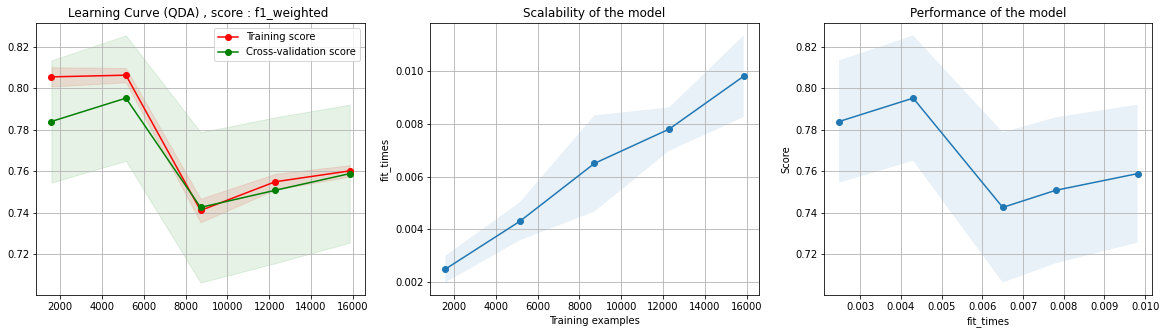

CPU times: user 2.56 s, sys: 297 ms, total: 2.86 s
Wall time: 8.25 s


In [ ]:
%%time
#Learning curve
X, y = X_train , Y_train

title = r"Learning Curve (QDA) , score : f1_weighted "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = QuadraticDiscriminantAnalysis()
plot_learning_curve(estimator, title, X, y, axes=None ,cv=100, n_jobs=-1)
plt.show()

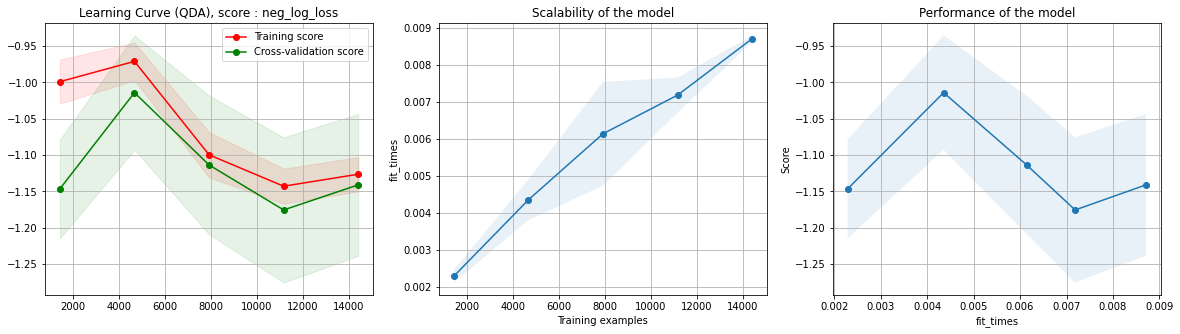

CPU times: user 688 ms, sys: 37.9 ms, total: 726 ms
Wall time: 1.25 s


In [ ]:
%%time
#Learning curve
X, y = X_train , Y_train

title = r"Learning Curve (QDA), score : neg_log_loss"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = QuadraticDiscriminantAnalysis()
plot_learning_curve(estimator, title, X, y, axes=None ,cv=10, n_jobs=-1, scoring= "neg_log_loss")

plt.show()

# The 6th model (5 Binary Classifiers)

In [ ]:
#defining the classifiers

clf_0 = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0) 

clf_1 = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0)

clf_2 = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0)

clf_3 = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0)

clf_4 = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_depth=24, 
                                random_state=0, 
                                min_samples_split=9, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_leaf_nodes=None,
                                max_samples=0.9,
                                oob_score=True,
                                warm_start=True,
                                min_weight_fraction_leaf=0)

In [ ]:
df_0=df[df["target"]==0]
df_1=df[df["target"]==1]
df_2=df[df["target"]==2]
df_3=df[df["target"]==3]
df_4=df[df["target"]==4]

from sklearn.utils import shuffle

df_0 = shuffle(df_0,random_state=0)
df_1 = shuffle(df_1,random_state=1)
df_2 = shuffle(df_2,random_state=2)
df_3 = shuffle(df_3,random_state=3)
df_4 = shuffle(df_4,random_state=4)

In [ ]:
#making classiferis binary!!!!


data_3 = pd.concat([df_0,df_1,df_2,df_4])
data_3 = data_3.sample(n=300,random_state=0,axis=0)
df_3 = df_3.sample(n=200,random_state=0,axis=0)

print('The classes and corresponding frequencies are: \n {}'.format(dict(Counter(data_3['target'])) )) 

data_3['target'] = data_3['target'].apply(lambda x: 0) 
df_3['target'] = df_3['target'].apply(lambda x: 1)

X_3 = pd.concat([df_3,data_3])
X_train_3 = X_3.drop('target', axis=1).values
Y_train_3 = X_3["target"].values


data_0 = pd.concat([df_3,df_1,df_2,df_4])
data_0 = data_0.sample(n=300,random_state=0,axis=0)
df_0 = df_0.sample(n=200,random_state=0,axis=0)

data_0['target'] = data_0['target'].apply(lambda x: 0) 
df_0['target'] = df_0['target'].apply(lambda x: 1)

X_0 = pd.concat([df_0,data_0])
X_train_0 = X_0.drop('target', axis=1).values
Y_train_0 = X_0["target"].values

data_1 = pd.concat([df_3,df_0,df_2,df_4])
data_1 = data_1.sample(n=300,random_state=0,axis=0)
df_1 = df_1.sample(n=200,random_state=0,axis=0)

data_1['target'] = data_1['target'].apply(lambda x: 0) 
df_1['target'] = df_1['target'].apply(lambda x: 1)

X_1 = pd.concat([df_1,data_1])
X_train_1 = X_1.drop('target', axis=1).values
Y_train_1 = X_1["target"].values

data_2 = pd.concat([df_3,df_0,df_1,df_4])
data_2 = data_2.sample(n=300,random_state=0,axis=0)
df_2 = df_2.sample(n=200,random_state=0,axis=0)

data_2['target'] = data_2['target'].apply(lambda x: 0) 
df_2['target'] = df_2['target'].apply(lambda x: 1)

X_2 = pd.concat([df_2,data_2])
X_train_2 = X_2.drop('target', axis=1).values
Y_train_2 = X_2["target"].values



data_4 = pd.concat([df_3,df_0,df_1,df_2])
data_4 = data_4.sample(n=300,random_state=0,axis=0)
df_4 = df_4.sample(n=200,random_state=0,axis=0)

data_4['target'] = data_4['target'].apply(lambda x: 0) 
df_4['target'] = df_4['target'].apply(lambda x: 1)

X_4 = pd.concat([df_4,data_4])
X_train_4 = X_4.drop('target', axis=1).values
Y_train_4 = X_4["target"].values


The classes and corresponding frequencies are: 
 {4: 136, 2: 6, 0: 130, 1: 28}


In [ ]:
%%time

##training classifiers
clf_3.fit(X_train_3, Y_train_3)
clf_0.fit(X_train_0, Y_train_0)
clf_1.fit(X_train_1, Y_train_1)
clf_2.fit(X_train_2, Y_train_2)
clf_4.fit(X_train_4, Y_train_4)

CPU times: user 1.02 s, sys: 15.3 ms, total: 1.04 s
Wall time: 1.04 s


In [ ]:
classifiers=[clf_0,clf_1,clf_2,clf_3,clf_4]  #list of classifiers

In [ ]:
def predict__(X):
  y_predict=[]
  for i in range(len(X)):
    j=0
    score=[0,0,0,0,0]
    #print(i)
    
    for clf in classifiers:
      temp1=clf.predict_proba(X)
      probs=temp1[i]
      #print(probs[0])
      #print(j)
      if probs[1] >= probs[0]:
        #print("yes")
        score[j]=probs[1]
        
      else: 
        score[j]=-1
      j=j+1   
    #print("yes")  
    
    #score=np.array(score)
    temp2=np.array(score)
    n = np.max(temp2)
    y_predict.append(score.index(n))

  return y_predict

In [ ]:
X_for_train, X_for_test, Y_for_train, Y_for_test = train_test_split(X,Y,test_size=400,random_state=0, shuffle=True)

In [ ]:
print('The classes and corresponding frequencies are: \n {}'.format(dict(Counter(Y_for_test)) )) 

The classes and corresponding frequencies are: 
 {0: 165, 2: 6, 4: 163, 3: 35, 1: 31}


In [ ]:
predict_y=predict__(X_for_test)

In [ ]:
sixth_clf_report = classification_report(Y_for_test, predict_y)
print(sixth_clf_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       165
           1       0.80      0.77      0.79        31
           2       0.31      0.83      0.45         6
           3       0.89      0.89      0.89        35
           4       0.92      0.85      0.89       163

    accuracy                           0.88       400
   macro avg       0.77      0.85      0.79       400
weighted avg       0.89      0.88      0.89       400



In [ ]:
targets

['RRLYR', 'T2CEP', 'ACEP', 'CEP', 'ECL']

In [ ]:
%%time
y_predict = predict__(X_test)

CPU times: user 9min 51s, sys: 159 ms, total: 9min 52s
Wall time: 9min 52s


In [ ]:
sixth_clf_report = classification_report(Y_test, y_predict)
print(sixth_clf_report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1638
           1       0.80      0.77      0.79       319
           2       0.26      0.90      0.40        60
           3       0.90      0.85      0.88       446
           4       0.90      0.86      0.88      1542

    accuracy                           0.87      4005
   macro avg       0.76      0.86      0.77      4005
weighted avg       0.89      0.87      0.87      4005



**Logistic Regression (Just for test)**

In [ ]:
#defining the classifiers
from sklearn.linear_model import LogisticRegression

clf_0 = LogisticRegression(multi_class='multinomial',penalty='l2', solver='newton-cg',l1_ratio=0,max_iter=1000,C=3, tol=0.01)

clf_1 = LogisticRegression(multi_class='multinomial',penalty='l2', solver='newton-cg',l1_ratio=0,max_iter=1000,C=3, tol=0.01)

clf_2 = LogisticRegression(multi_class='multinomial',penalty='l2', solver='newton-cg',l1_ratio=0,max_iter=1000,C=3, tol=0.01)

clf_3 = LogisticRegression(multi_class='multinomial',penalty='l2', solver='newton-cg',l1_ratio=0,max_iter=1000,C=3, tol=0.01)

clf_4 = LogisticRegression(multi_class='multinomial',penalty='l2', solver='newton-cg',l1_ratio=0,max_iter=1000,C=3, tol=0.01)

In [ ]:
df_0=df[df["target"]==0]
df_1=df[df["target"]==1]
df_2=df[df["target"]==2]
df_3=df[df["target"]==3]
df_4=df[df["target"]==4]

from sklearn.utils import shuffle

df_0 = shuffle(df_0,random_state=0)
df_1 = shuffle(df_1,random_state=1)
df_2 = shuffle(df_2,random_state=2)
df_3 = shuffle(df_3,random_state=3)
df_4 = shuffle(df_4,random_state=4)

In [ ]:
from sklearn.utils import compute_class_weight
weights=compute_class_weight ("balanced", [0,1,2,3,4], Y)
class_weight=dict()
for i in range(len(targets)):
  class_weight[i]=weights[i]

class_weight

{0: 1.7229776247848536,
 1: 2.5375158428390368,
 2: 0.5248656442521956,
 3: 0.4901701554657853,
 4: 12.474143302180686}

In [ ]:
#making classiferis binary!!!!


data_3 = pd.concat([df_0,df_1,df_2,df_4])
data_3 = data_3.sample(n=300,random_state=0,axis=0)
df_3 = df_3.sample(n=200,random_state=0,axis=0)

print('The classes and corresponding frequencies are: \n {}'.format(dict(Counter(data_3['target'])) )) 

data_3['target'] = data_3['target'].apply(lambda x: 0) 
df_3['target'] = df_3['target'].apply(lambda x: 1)

X_3 = pd.concat([df_3,data_3])
X_train_3 = X_3.drop('target', axis=1).values
Y_train_3 = X_3["target"].values


data_0 = pd.concat([df_3,df_1,df_2,df_4])
data_0 = data_0.sample(n=300,random_state=0,axis=0)
df_0 = df_0.sample(n=200,random_state=0,axis=0)

data_0['target'] = data_0['target'].apply(lambda x: 0) 
df_0['target'] = df_0['target'].apply(lambda x: 1)

X_0 = pd.concat([df_0,data_0])
X_train_0 = X_0.drop('target', axis=1).values
Y_train_0 = X_0["target"].values

data_1 = pd.concat([df_3,df_0,df_2,df_4])
data_1 = data_1.sample(n=300,random_state=0,axis=0)
df_1 = df_1.sample(n=200,random_state=0,axis=0)

data_1['target'] = data_1['target'].apply(lambda x: 0) 
df_1['target'] = df_1['target'].apply(lambda x: 1)

X_1 = pd.concat([df_1,data_1])
X_train_1 = X_1.drop('target', axis=1).values
Y_train_1 = X_1["target"].values

data_2 = pd.concat([df_3,df_0,df_1,df_4])
data_2 = data_2.sample(n=300,random_state=0,axis=0)
df_2 = df_2.sample(n=200,random_state=0,axis=0)

data_2['target'] = data_2['target'].apply(lambda x: 0) 
df_2['target'] = df_2['target'].apply(lambda x: 1)

X_2 = pd.concat([df_2,data_2])
X_train_2 = X_2.drop('target', axis=1).values
Y_train_2 = X_2["target"].values



data_4 = pd.concat([df_3,df_0,df_1,df_2])
data_4 = data_4.sample(n=300,random_state=0,axis=0)
df_4 = df_4.sample(n=200,random_state=0,axis=0)

data_4['target'] = data_4['target'].apply(lambda x: 0) 
df_4['target'] = df_4['target'].apply(lambda x: 1)

X_4 = pd.concat([df_4,data_4])
X_train_4 = X_4.drop('target', axis=1).values
Y_train_4 = X_4["target"].values


The classes and corresponding frequencies are: 
 {2: 210, 0: 52, 1: 30, 4: 8}


In [ ]:
%%time

##training classifiers
clf_3.fit(X_train_3, Y_train_3)
clf_0.fit(X_train_0, Y_train_0)
clf_1.fit(X_train_1, Y_train_1)
clf_2.fit(X_train_2, Y_train_2)
clf_4.fit(X_train_4, Y_train_4)

CPU times: user 193 ms, sys: 1.98 ms, total: 195 ms
Wall time: 199 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

In [ ]:
classifiers=[clf_0,clf_1,clf_2,clf_3,clf_4]  #list of classifiers

In [ ]:
def predict__(X):
  y_predict=[]
  for i in range(len(X)):
    j=0
    score=[0,0,0,0,0]
    #print(i)
    
    for clf in classifiers:
      temp1=clf.predict_proba(X)
      probs=temp1[i]
      #print(probs[0])
      #print(j)
      if probs[1] >= probs[0]:
        #print("yes")
        score[j]=probs[1]
        
      else: 
        score[j]=-1
      j=j+1   
    #print("yes")  
    
    #score=np.array(score)
    temp2=np.array(score)
    n = np.max(temp2)
    y_predict.append(score.index(n))

  return y_predict

In [ ]:
y_pred = predict__(X_test)

In [ ]:
sixth_clf_report = classification_report(Y_test, y_pred)
print(sixth_clf_report)

              precision    recall  f1-score   support

           0       0.49      0.73      0.58       446
           1       0.61      0.61      0.61       319
           2       0.82      0.80      0.81      1542
           3       0.92      0.81      0.86      1638
           4       0.29      0.25      0.27        60

    accuracy                           0.78      4005
   macro avg       0.62      0.64      0.63      4005
weighted avg       0.80      0.78      0.78      4005

